In [101]:
import numpy as np
import pandas as pd
import math
import lasio
import matplotlib.pyplot as plt  # GRAPHS
%matplotlib inline


In [102]:
las = lasio.read(r"C:\Users\Angelica\Desktop\Tinmiaq_2\registros_T2.las")
las_DM =lasio.read (r"C:\Users\Angelica\Desktop\Tinmiaq_2\DM-2077-4158ft.las")

In [103]:
well = las.well
headers = las.curves
params = las.params
logs = las.data
RES = las["AT90"]
DEPTH = las.index
GR = las["GR_EDTC"]
RHOZ = las["RHOZ"]
NPHI= las["NPHI"]
RHET= las["RHET"]
sonico=las_DM['DTCO']
Depth= las_DM.index
GR_DT = las_DM["GR_EDTC"]
dt = 2800
bt=3800
temp=((0.0198*DEPTH)+ 26.921)

In [104]:
a= 400000
b=0.88
tsup= 25
WS=18000
RWs= (a/tsup/WS)**b
tf=temp
Kt1=6.77
RW2=(RWs*(tsup+Kt1))/(temp+Kt1)

In [105]:
df = las.df()
las.set_data(df)
enc = las_DM.curves

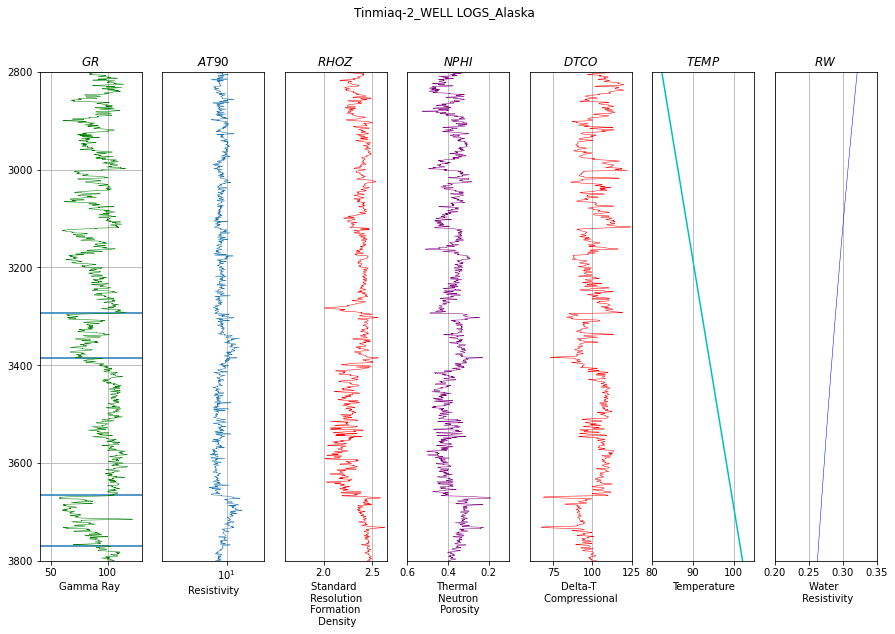

In [106]:
plt.figure(figsize=(15,9))
plt.subplot(171)
plt.plot(GR,DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130, dt,bt])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3769.49, xmin=0, xmax=130)

plt.hlines(y=3292.25, xmin=0, xmax=130)
plt.hlines(y=3384.75, xmin=0, xmax=130)

plt.hlines(y=2346.92, xmin=0, xmax=130)
plt.hlines(y=2500.65, xmin=0, xmax=130)


plt.subplot(172)
plt.plot(RES,DEPTH,lw=0.5)
plt.axis([0.19, 100, dt,bt])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(173)
plt.plot(RHOZ,DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65, dt,bt])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(174)
plt.plot(NPHI,DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1, dt,bt])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(175)
plt.plot(sonico,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125, dt,bt])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(176)
plt.plot(temp,DEPTH,'c')
plt.axis([80, 105, dt,bt])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(177)
plt.plot(RW2,DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.2, 0.35, dt,bt])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)



plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

In [107]:
df['Vsh'] = (df.GR - df.GR.min()) / (df.GR.max() - df.GR.min()) 
print("Endpoint min Vsh")
print(df.GR.min())
print("Endpoint max Vsh")
print(df.GR.max())

Endpoint min Vsh
57.3108
Endpoint max Vsh
134.7625


In [117]:
xls = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Difraction')
prof=xls['Depth (ft)']
clays=xls['Clays']

In [118]:
xls1 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Routine Core')
long=xls1['depth']
poro=xls1['Porosity']
grain=xls1['Grain Density']
sw_core=xls1['tracer adjust water (sw)']
minimo=(min(grain))
maximo=(max(grain))
c=2.65
d=2.75
norm=(((grain-minimo)*(d-c)/(maximo-minimo))+c)

In [119]:
xls2 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='Core Gamma')
h=xls2['DEPTH']
cg=xls2['Core Gamma']
cg1=xls2['core']

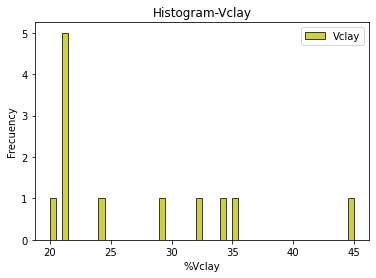

In [120]:
xls3 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='XRD_%Vol')
cl=xls3['Clays']
dp=xls3['Depth (ft)']
plt.hist(cl,bins=50,facecolor='y',alpha=0.75,ec='black', label="Vclay")
plt.title('Histogram-Vclay')
plt.xlabel('%Vclay')
plt.ylabel('Frecuency')
plt.legend()

In [121]:
xls4 = pd.read_excel (r'C:\Users\Angelica\Desktop\Tinmiaq_2\Information_T2.xlsx', sheet_name='SW')
SW_archie=xls4['Sw_Archie']
PROF=xls4['DEPTH']
arch=xls4['Sw_a']

In [147]:
## VSH-VLAY-GD-POR
vsh_min=30
vsh_max=120
Vsh =((df.GR - vsh_min) / (vsh_max - vsh_min) ) 
Vclay1=(0.6)*Vsh     ## Vclay en funcion de Vsh

mud_density=1.13835   #en g/cc
sand_density=2.65
assumed_density_Vsh=2.75

grain_density=(Vsh*assumed_density_Vsh+(1-Vsh)*sand_density)
porosity=(grain_density-RHOZ)/(grain_density-mud_density)

In [148]:
## SW_Archie
## SW=((a*Rw)/(Rt*(Por)^m))^(1/n)
## Rt= AT90=RES
## Rw= RW2
a1=1
m=2
n=2
sup=(a1* RW2)
down=(((porosity)**m)*RES)
Sw_a=(sup/down)**(1/n)
Sw_a1=np.where(Sw_a>1,1,Sw_a)
print(Sw_a1)

[       nan        nan        nan ... 0.77235813 0.76293541 0.81095998]


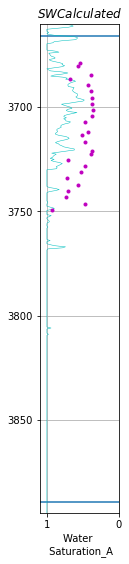

In [151]:
plt.figure(figsize=(15,9))
plt.subplot(191)
plt.plot (Sw_a1,DEPTH,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW Calculated$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

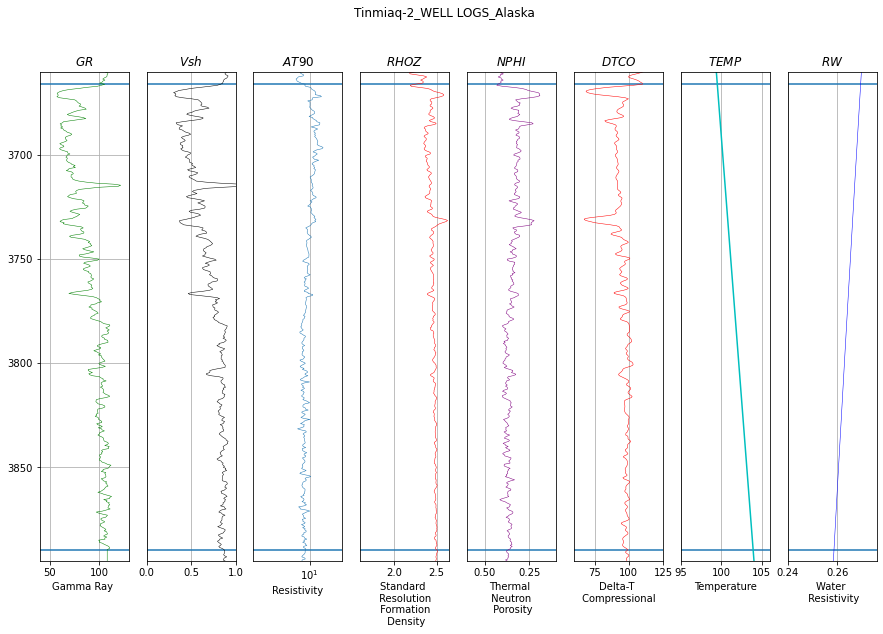

In [152]:
plt.figure(figsize=(15,9))
plt.subplot(181)
plt.plot(GR,DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130,top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(182)
plt.plot(Vsh,DEPTH,'black',lw=0.5)
plt.axis([0,1, top,bottom])
plt.title('$Vsh$')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(183)
plt.plot(RES,DEPTH,lw=0.5)
plt.axis([0.19, 100,top,bottom])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(184)
plt.plot(RHOZ,DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65,top,bottom])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(185)
plt.plot(NPHI,DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1,top,bottom])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(186)
plt.plot(sonico,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125,top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(187)
plt.plot(temp,DEPTH,'c')
plt.axis([95, 106,top,bottom])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(188)
plt.plot(RW2,DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.24, 0.276, top,bottom])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)




plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

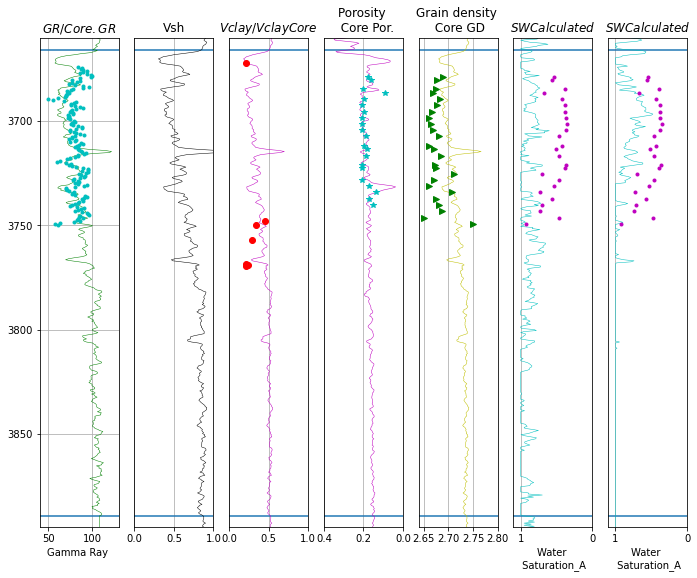

In [153]:
top=3660
bottom=3895
plt.figure(figsize=(15,9))
plt.subplot(191)
plt.plot (GR,DEPTH,'g',cg1,(h+3),'c.',lw=0.5)
plt.title('$GR/ Core.GR $')
plt.axis([40,130,top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(192)
plt.title('Vsh')
plt.plot (Vsh,DEPTH,'black',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(193)
plt.title('$Vclay/Vclay Core$')
plt.plot (Vclay1,DEPTH,'m',clays,(prof+3),'ro',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(194)
plt.title('Porosity \n  Core Por.')
plt.plot (porosity,DEPTH,'m',poro,(long+3),'c*',lw=0.5)
plt.axis([0, 0.4, top,bottom])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(195)
plt.title('Grain density \n Core GD')
plt.plot (grain_density,DEPTH,'y',norm,(long+3),'g>',lw=0.5)
plt.axis([2.64, 2.8, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(196)
plt.plot (sw,DEPTH,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW Calculated$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(197)
plt.plot (Sw_a1,DEPTH,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW Calculated$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)